# Data Preprocessing function

In [1]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Hyperparameter tuning

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

def tuning(X,y):
    clfs = {'gnb': GaussianNB()}
    pipe_clfs = {}

    #set pipeline
    for name, clf in clfs.items():
        pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
        
    #set parameter scope
    param_grids = {}
    param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

    # Implement me
    param_grids['gnb'] = param_grid

    # The list of [best_score_, best_params_, best_estimator_]
    best_score_param_estimators = []

    # For classifier
    for name in pipe_clfs.keys():
        # GridSearchCV
        gs = GridSearchCV(estimator=pipe_clfs[name],
                          param_grid=param_grids[name],
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=StratifiedKFold(n_splits=10,
                                                 shuffle=True,
                                                 random_state=0))
        # Fit the pipeline
        gs = gs.fit(X, y)
        print(gs.best_params_, gs.best_estimator_)

# Get the posterior probability function

In [3]:
import numpy as np

def prob(X, y):
    #calculate every attribute value's the posterior probability
    for j in range(X.shape[1]):#column
        for i in range(X.shape[0]):#row
            for k in np.unique(y):#class
                prob_dist[j, i, k] = np.exp(-((X[i, j] - clf.theta_[k, j]) ** 2 / (2 * clf.sigma_[k, j] ** 2))) / (np.sqrt(2 * (np.pi) * clf.sigma_[k, j] ** 2))
            prob_dist[j, i, :] /= np.sum(prob_dist[j, i, :])
    

# Plot distribution function

In [4]:
import matplotlib.pyplot as plt

def plot_distribution(prob_dist, X, feature, class_):
    """
    Plot the probability distribution of a class based on the feature
    """
    
    # Get the column number of the feature
    j = features.index(feature)
    
    # Get the unique feature values and their indices
    vals, indices = np.unique(X[:, j], return_index=True)
    vals = np.round(vals, 2)
    
    # Get the encoded number of the class_
    if class_.isdigit():
        k = int(class_)
    else:
        k = le.transform([class_])[0]
    
    # Get the probabilities
    probas = prob_dist[j, indices, k] 
    
    # Get the pandas dataframe
    df = pd.DataFrame(list(zip(vals, probas)), columns=[feature, 'Probability'])
    
    # Sort the feature value in asscending order
    df = df.sort_values(by=[feature])
    
    d = dict({'w25698': 'software', 'w30360': 'year', 'w21347': 'people','w41': 'feature14', 'w42': 'column 15', 
              'PPE': 'PPE', 'Jitter:DDP': 'Jitter:DDP', 'word_freq_address': 'word_freq_address', 'char_freq_$':'char_freq_$',
              'H3K36me3_c14c': 'H3K36me3_c14c', 'H3K36me3_c12':'H3K36me3_c12', 'H4K': 'H4K','YY1':'YY1',
              'Ethnicity':'Ethnicity','spread1':'spread1','MDVP:Fo(Hz)':'MDVP:Fo(Hz)','char_freq_!':'char_freq_!',
              '10-15B':'10-15B','16-16R':'16-16R','16-16G':'16-16G','16-16B':'16-16B'}) 
    
    
    # Plot the histogram
    df.plot(x=feature,
            y='Probability',
            kind='bar',
            yticks=[0, 0.25, 0.5, 0.75, 1],
            ylim=(0, 1),
            xlim=[-1.5,3.8],
            figsize=(10, 5),
            title=class_,
            legend=False,
            fontsize=30,
            color='b',
            rot=0
             )
    
    
    # If the feature has more than 20 unique values
    if feature=='Ethnicity':
        plt.xticks(range(0,7),range(1,8), fontsize=30, rotation=0)
    elif len(vals) > 5:
        n = len(vals)
        mid = n // 2
        plt.xticks([0, mid, n - 1], [vals[0], vals[mid], vals[n - 1]], fontsize=30, rotation=0)
    
    
    plt.xlabel(d[feature], fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.title('GNB', fontsize=30)
    plt.tight_layout()

# parkinsons' distribution

# Load data

In [5]:
import pandas as pd

# Load the data
df = pd.read_csv('parkinsons.data', header=1)

# Specify the name of the columns
df.columns = ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
# Specify the name of the features
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)' ,'MDVP:RAP' ,'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

df.drop('name', axis=1, inplace=True)

# Get the features
X = df[features].values
# Get the target
y = df['status'].values

# Data preprocessing

In [6]:
# Standardize the features
X = scaler.fit_transform(X)

# Hyperparameter tuning

In [7]:
tuning(X,y)

{'clf__var_smoothing': 1e-10} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])


/home/user/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Fit X and y

In [8]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-10)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-10)

# Get the posterior probability

In [9]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

# Plot distributions

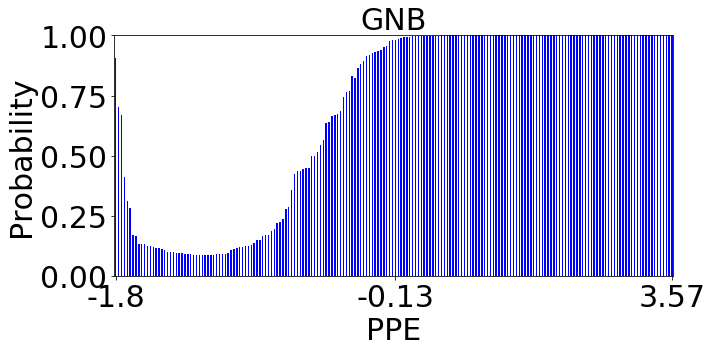

In [10]:
#plot the distribution
plot_distribution(prob_dist, X, 'PPE', '1')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-parkinsons-1-PPE.png', dpi=300)
plt.show()

# Drug consuption's distributions

# Load data

In [11]:
import pandas as pd

# Load the data
df = pd.read_csv('drug_consumption.csv', header=None)
# or df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)

# Specify the name of the columns
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country','Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore','Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet','Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack','Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']

# Features
features = ['ID', 'Age', 'Gender', 'Education', 'Country','Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore','Cscore', 'Impulsive', 'SS']

# Get the features
X = df[features].values

# Get the target
y = df['Heroin'].values

for i in range(0,1885):
    if not y[i] == 'CL0' :
        y[i] = 'CL7'

# Data preprocessing

In [12]:
# Standardize the features
X = scaler.fit_transform(X)

# Encode the target
y = le.fit_transform(y)

# Hyperparameter tuning

In [13]:
tuning(X,y)

{'clf__var_smoothing': 1e-10} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])


# Fit X and y

In [14]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-10)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-10)

# Get the posterior probability

In [15]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

# Plot distributions

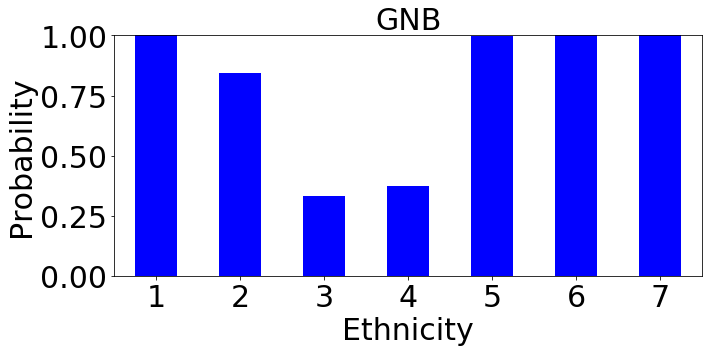

In [16]:
#plot the distribution
plot_distribution(prob_dist, X, 'Ethnicity', 'CL0')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-drug-cl0-Ethnicity.png', dpi=300)
plt.show()

# drosophila_enhancers' distributions

# Load data

In [17]:
import pandas as pd

# Load the data
df = pd.read_csv('drosophila_enhancers.csv', header=1)

# Specify the name of the columns
df.columns = ['positive','H3_c12','H3_c14a','H3_c14c','H3_c8','H3K18ac_c12','H3K18ac_c14a','H3K18ac_c14c',
              'H3K18ac_c8','H3K27ac_c12','H3K27ac_c14a','H3K27ac_c14c','H3K27ac_c8','H3K27me3_c12','H3K27me3_c14a','H3K27me3_c14c','H3K36me3_c12',
              'H3K36me3_c14a','H3K36me3_c14c','H3K4me1_c12','H3K4me1_c14a','H3K4me1_c14c','H3K4me1_c8','H3K4me3_c12','H3K4me3_c14a','H3K4me3_c14c',
              'H3K4me3_c8','H3K9ac_c12','H3K9ac_c14a','H3K9ac_c14c','H3K9ac_c8','H4K5ac_c12','H4K5ac_c14a','H4K5ac_c14c','H4K5ac_c8','H4K8ac_c12',
              'H4K8ac_c14a','H4K8ac_c14c','H4K8ac_c8','input_c12','input_c14a','input_c14c','input_c8','wt_H3','wt_H3K18ac','wt_H3K4me1','wt_ZLD','bcd1',
              'bcd2','cad1','D1','da2','dl3','ftz3','gt2','h1','h2','hb1','hb2','hkb1','hkb2','hkb3','kni1','kni2','kr1','kr2','mad2','med2','prdBQ','prdFQ',
              'run1','run2','shn2','shn3','slp1','sna1','sna2','tll1','twi1','twi2','z2']

# Features
features = ['H3_c12','H3_c14a','H3_c14c','H3_c8','H3K18ac_c12','H3K18ac_c14a','H3K18ac_c14c',
              'H3K18ac_c8','H3K27ac_c12','H3K27ac_c14a','H3K27ac_c14c','H3K27ac_c8','H3K27me3_c12','H3K27me3_c14a','H3K27me3_c14c','H3K36me3_c12',
              'H3K36me3_c14a','H3K36me3_c14c','H3K4me1_c12','H3K4me1_c14a','H3K4me1_c14c','H3K4me1_c8','H3K4me3_c12','H3K4me3_c14a','H3K4me3_c14c',
              'H3K4me3_c8','H3K9ac_c12','H3K9ac_c14a','H3K9ac_c14c','H3K9ac_c8','H4K5ac_c12','H4K5ac_c14a','H4K5ac_c14c','H4K5ac_c8','H4K8ac_c12',
              'H4K8ac_c14a','H4K8ac_c14c','H4K8ac_c8','input_c12','input_c14a','input_c14c','input_c8','wt_H3','wt_H3K18ac','wt_H3K4me1','wt_ZLD','bcd1',
              'bcd2','cad1','D1','da2','dl3','ftz3','gt2','h1','h2','hb1','hb2','hkb1','hkb2','hkb3','kni1','kni2','kr1','kr2','mad2','med2','prdBQ','prdFQ',
              'run1','run2','shn2','shn3','slp1','sna1','sna2','tll1','twi1','twi2','z2']
# Get the features
X = df[features].values

# Get the target
y = df['positive'].values

# Data preprocessing

In [18]:
# Standardize the features
X = scaler.fit_transform(X)

# Hyperparameter tuning

In [19]:
tuning(X,y)

{'clf__var_smoothing': 1e-10} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])


# Fit X and y

In [20]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-10)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-10)

# Get the posterior probability

In [21]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

# Plot distributions

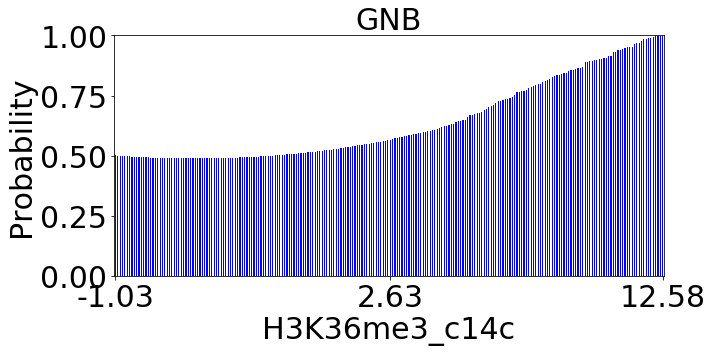

In [22]:
#plot the distribution
plot_distribution(prob_dist, X, 'H3K36me3_c14c', '1')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-drosophila_enhancers-1-H3K36me3_c14c.png', dpi=300)
plt.show()

# alternative_splicing' distributions

# Load data

In [23]:
import pandas as pd

# Load the data
df = pd.read_csv('alternative_splicing.csv', header=1)

# Specify the name of the columns
df.columns = ['label','MYC_body_UTA','CTCF_body_UTA','POLR2A_body_UTA','ARID3A_body_Stanford','ATF1_body_HMS','ATF3_body_HMS','BACH1_body_Stanford',
              'BDP1_body_HMS','BHLHE40_body_Stanford','BRF1_body_HMS','BRF2_body_HMS','SMARCA4_body_Stanford','CCNT2_body_HMS','CUX1_body_Stanford',
              'FOS_body_Yale','CEBPB_body_Stanford','CHD2_body_Stanford','JUN_body_Stanford','JUN_body_Yale','JUN_body_Yale.1','JUN_body_Yale.2',
              'JUN_body_Stanford.1','JUN_body_Yale.3','MYC_body_Yale','MYC_body_Yale.1','MYC_body_Stanford','MYC_body_Yale.2','MYC_body_Stanford.1',
              'MYC_body_Yale.3','RCOR1_body_Stanford','RCOR1_body_Stanford.1','E2F4_body_USC','CTCF_body_Stanford','E2F6_body_USC','ELK1_body_Stanford',
              'GATA1_body_USC','GATA1_body_Stanford','GATA2_body_USC','GTF2B_body_HMS','GTF2F1_body_Stanford','HCFC1_body_Stanford','HMGN3_body_HMS',
              'SMARCB1_body_Stanford','IRF1_body_Stanford','IRF1_body_Stanford.1','IRF1_body_Stanford.2','IRF1_body_Stanford.3','TRIM28_body_USC','JUND_body_Stanford',
              'MAFF_body_Stanford','MAFK_body_Stanford','MAX_body_Stanford','MAX_body_Yale','MXI1_body_Stanford','NFE2_body_Yale','NFYA_body_Stanford','NFYB_body_Stanford',
              'NRF1_body_Stanford','EP300_body_Stanford','EP300_body_Stanford.1','POLR2A_body_Yale','POLR2A_body_Yale.1','POLR2A_body_Stanford',
              'POLR2A_body_Yale.2','POLR2A_body_Stanford.1','POLR2A_body_Yale.3','POLR2AphosphoS2_body_Stanford','POLR2AphosphoS2_body_Stanford.1','POLR3G_body_Stanford',
              'RAD21_body_Yale','RFX5_body_Stanford','POLR3A_body_HMS','SETDB1_body_USC','SETDB1_body_USC.1','SIRT6_body_HMS','STAT1_body_Yale','SMC3_body_Stanford',
              'STAT1_body_Yale.1','STAT1_body_Stanford','STAT1_body_Stanford.1','STAT2_body_Yale','STAT2_body_Yale.1','TAL1_body_Stanford','TBL1XR1_body_Stanford','TBL1XR1_body_Stanford.1',
              'TBP_body_Stanford','GTF3C2_body_HMS','NR2C2_body_USC','UBTF_body_Stanford','UBTF_body_Stanford.1','USF2_body_Stanford','XRCC4_body_Yale','YY1',
              'ZNF143_body_Stanford','ZNF263_body_USC','ZNF274_body_USC','ZNF274_body_USC.1','ZNF384_body_Stanford','ZMIZ1_body_Stanford','eGFP.FOS_body_UChicago',
              'eGFP.GATA2_body_UChicago','eGFP.HDAC8_body_UChicago','eGFP.JUNB_body_UChicago','eGFP.JUND_body_UChicago','eGFP.NR4A1_body_UChicago','CTCF_body_UW',
              'CTCF_body_UW.1','CHD1_body_ENCODE','CTCF_body_ENCODE','EZH2_body_ENCODE','HDAC1_body_ENCODE','HDAC2_body_ENCODE','HDAC6_body_ENCODE','EP300_body_ENCODE',
              'PHF8_body_ENCODE','KDM5B_body_ENCODE','POLR2A_body_ENCODE','RBBP5_body_ENCODE','SAP30_body_ENCODE','ATF3_body_ENCODE','BCL3_body_ENCODE','CBX3_body_ENCODE',
              'CEBPB_body_ENCODE','CTCF_body_ENCODE.1','CTCFL_body_ENCODE','E2F6_body_ENCODE','EGR1_body_ENCODE','ELF1_body_ENCODE','ETS1_body_ENCODE','FOSL1_body_ENCODE',
              'GABPA_body_ENCODE','GATA2_body_ENCODE','HDAC2_body_ENCODE.1','MAX_body_ENCODE','MEF2A_body_ENCODE','NR2F2_body_ENCODE','REST_body_ENCODE','PML_body_ENCODE',
              'POLR2AphosphoS5_body_ENCODE','POLR2A_body_ENCODE.1','SPI1_body_ENCODE','RAD21_body_ENCODE','SIN3A_body_ENCODE','SIX5_body_ENCODE',
              'SP1_body_ENCODE','SP2_body_ENCODE','SRF_body_ENCODE','STAT5A_body_ENCODE','TAF1_body_ENCODE','TAF7_body_ENCODE','TEAD4_body_ENCODE','THAP1_body_ENCODE',
              'USF1_body_ENCODE','YY1_body_ENCODE','YY1_body_ENCODE.1','ZBTB33_body_ENCODE','ZBTB7A_body_ENCODE','ARID3A_body_ENCODE','ATF1_body_ENCODE','ATF3_body_ENCODE.1',
              'BACH1_body_ENCODE','BDP1_body_ENCODE','BHLHE40_body_ENCODE','BRF1_body_ENCODE','BRF2_body_ENCODE','SMARCA4_body_ENCODE','CCNT2_body_ENCODE',
              'CEBPB_body_ENCODE.1','FOS_body_ENCODE','CHD2_body_ENCODE','JUN_body_ENCODE','JUN_body_ENCODE.1','JUN_body_ENCODE.2','JUN_body_ENCODE.3',
              'JUN_body_ENCODE.4','MYC_body_ENCODE','MYC_body_ENCODE.1','MYC_body_ENCODE.2','MYC_body_ENCODE.3','MYC_body_ENCODE.4','MYC_body_ENCODE.5',
              'RCOR1_body_ENCODE','RCOR1_body_ENCODE.1','CTCF_body_ENCODE.2','E2F4_body_ENCODE','E2F6_body_ENCODE.1','ELK1_body_ENCODE','GATA1_body_ENCODE',
              'GATA2_body_ENCODE.1','GTF2B_body_ENCODE','GTF2F1_body_ENCODE','HMGN3_body_ENCODE','SMARCB1_body_ENCODE','IRF1_body_ENCODE','IRF1_body_ENCODE.1',
              'IRF1_body_ENCODE.2','IRF1_body_ENCODE.3','JUND_body_ENCODE','TRIM28_body_ENCODE','MAFF_body_ENCODE','MAFK_body_ENCODE','MAX_body_ENCODE.1',
              'MXI1_body_ENCODE','NFE2_body_ENCODE','NFYA_body_ENCODE','NFYB_body_ENCODE','NRF1_body_ENCODE','EP300_body_ENCODE.1','POLR2A_body_ENCODE.2','POLR2A_body_ENCODE.3',
              'POLR2A_body_ENCODE.4','POLR2A_body_ENCODE.5','POLR2A_body_ENCODE.6','POLR2A_body_ENCODE.7','POLR2AphosphoS2_body_ENCODE','POLR3G_body_ENCODE','RAD21_body_ENCODE.1',
              'RFX5_body_ENCODE','POLR3A_body_ENCODE','SETDB1_body_ENCODE','SETDB1_body_ENCODE.1','SIRT6_body_ENCODE','SMC3_body_ENCODE','STAT1_body_ENCODE','STAT1_body_ENCODE.1',
              'STAT1_body_ENCODE.2','STAT1_body_ENCODE.3','STAT2_body_ENCODE','STAT2_body_ENCODE.1','TAL1_body_ENCODE','TBL1XR1_body_ENCODE','TBL1XR1_body_ENCODE.1','TBP_body_ENCODE',
              'GTF3C2_body_ENCODE','NR2C2_body_ENCODE','UBTF_body_ENCODE','UBTF_body_ENCODE.1','USF2_body_ENCODE','YY1_body_ENCODE.2','ZNF143_body_ENCODE','ZNF263_body_ENCODE','ZNF274_body_ENCODE',
              'ZNF274_body_ENCODE.1','MYC_body_ENCODE.6','CTCF_body_ENCODE.3','POLR2A_body_ENCODE.8','CTCF_body_ENCODE.4','POLR2AphosphoS2_body_ENCODE.1','eGFP.FOS_body_ENCODE',
              'eGFP.GATA2_body_ENCODE','eGFP.HDAC8_body_ENCODE','eGFP.JUNB_body_ENCODE','eGFP.JUND_body_ENCODE','H3K27ac_body_Broad','H3K27me3_body_Broad','H3K36me3_body_Broad','H3K4me1_body_Broad',
              'H3K4me2_body_Broad','H3K4me3_body_Broad','H3K79me2_body_Broad','H3K9ac_body_Broad','H3K9me1_body_Broad','H3K9me3_body_Broad','H4K','H3K27me3_body_UW',
              'H3K27me3_body_UW.1','H3K36me3_body_UW','H3K36me3_body_UW.1','H3K4me3_body_UW','H3K4me3_body_UW.1']

# Features
features = ['MYC_body_UTA','CTCF_body_UTA','POLR2A_body_UTA','ARID3A_body_Stanford','ATF1_body_HMS','ATF3_body_HMS','BACH1_body_Stanford',
              'BDP1_body_HMS','BHLHE40_body_Stanford','BRF1_body_HMS','BRF2_body_HMS','SMARCA4_body_Stanford','CCNT2_body_HMS','CUX1_body_Stanford',
              'FOS_body_Yale','CEBPB_body_Stanford','CHD2_body_Stanford','JUN_body_Stanford','JUN_body_Yale','JUN_body_Yale.1','JUN_body_Yale.2',
              'JUN_body_Stanford.1','JUN_body_Yale.3','MYC_body_Yale','MYC_body_Yale.1','MYC_body_Stanford','MYC_body_Yale.2','MYC_body_Stanford.1',
              'MYC_body_Yale.3','RCOR1_body_Stanford','RCOR1_body_Stanford.1','E2F4_body_USC','CTCF_body_Stanford','E2F6_body_USC','ELK1_body_Stanford',
              'GATA1_body_USC','GATA1_body_Stanford','GATA2_body_USC','GTF2B_body_HMS','GTF2F1_body_Stanford','HCFC1_body_Stanford','HMGN3_body_HMS',
              'SMARCB1_body_Stanford','IRF1_body_Stanford','IRF1_body_Stanford.1','IRF1_body_Stanford.2','IRF1_body_Stanford.3','TRIM28_body_USC','JUND_body_Stanford',
              'MAFF_body_Stanford','MAFK_body_Stanford','MAX_body_Stanford','MAX_body_Yale','MXI1_body_Stanford','NFE2_body_Yale','NFYA_body_Stanford','NFYB_body_Stanford',
              'NRF1_body_Stanford','EP300_body_Stanford','EP300_body_Stanford.1','POLR2A_body_Yale','POLR2A_body_Yale.1','POLR2A_body_Stanford',
              'POLR2A_body_Yale.2','POLR2A_body_Stanford.1','POLR2A_body_Yale.3','POLR2AphosphoS2_body_Stanford','POLR2AphosphoS2_body_Stanford.1','POLR3G_body_Stanford',
              'RAD21_body_Yale','RFX5_body_Stanford','POLR3A_body_HMS','SETDB1_body_USC','SETDB1_body_USC.1','SIRT6_body_HMS','STAT1_body_Yale','SMC3_body_Stanford',
              'STAT1_body_Yale.1','STAT1_body_Stanford','STAT1_body_Stanford.1','STAT2_body_Yale','STAT2_body_Yale.1','TAL1_body_Stanford','TBL1XR1_body_Stanford','TBL1XR1_body_Stanford.1',
              'TBP_body_Stanford','GTF3C2_body_HMS','NR2C2_body_USC','UBTF_body_Stanford','UBTF_body_Stanford.1','USF2_body_Stanford','XRCC4_body_Yale','YY1',
              'ZNF143_body_Stanford','ZNF263_body_USC','ZNF274_body_USC','ZNF274_body_USC.1','ZNF384_body_Stanford','ZMIZ1_body_Stanford','eGFP.FOS_body_UChicago',
              'eGFP.GATA2_body_UChicago','eGFP.HDAC8_body_UChicago','eGFP.JUNB_body_UChicago','eGFP.JUND_body_UChicago','eGFP.NR4A1_body_UChicago','CTCF_body_UW',
              'CTCF_body_UW.1','CHD1_body_ENCODE','CTCF_body_ENCODE','EZH2_body_ENCODE','HDAC1_body_ENCODE','HDAC2_body_ENCODE','HDAC6_body_ENCODE','EP300_body_ENCODE',
              'PHF8_body_ENCODE','KDM5B_body_ENCODE','POLR2A_body_ENCODE','RBBP5_body_ENCODE','SAP30_body_ENCODE','ATF3_body_ENCODE','BCL3_body_ENCODE','CBX3_body_ENCODE',
              'CEBPB_body_ENCODE','CTCF_body_ENCODE.1','CTCFL_body_ENCODE','E2F6_body_ENCODE','EGR1_body_ENCODE','ELF1_body_ENCODE','ETS1_body_ENCODE','FOSL1_body_ENCODE',
              'GABPA_body_ENCODE','GATA2_body_ENCODE','HDAC2_body_ENCODE.1','MAX_body_ENCODE','MEF2A_body_ENCODE','NR2F2_body_ENCODE','REST_body_ENCODE','PML_body_ENCODE',
              'POLR2AphosphoS5_body_ENCODE','POLR2A_body_ENCODE.1','SPI1_body_ENCODE','RAD21_body_ENCODE','SIN3A_body_ENCODE','SIX5_body_ENCODE',
              'SP1_body_ENCODE','SP2_body_ENCODE','SRF_body_ENCODE','STAT5A_body_ENCODE','TAF1_body_ENCODE','TAF7_body_ENCODE','TEAD4_body_ENCODE','THAP1_body_ENCODE',
              'USF1_body_ENCODE','YY1_body_ENCODE','YY1_body_ENCODE.1','ZBTB33_body_ENCODE','ZBTB7A_body_ENCODE','ARID3A_body_ENCODE','ATF1_body_ENCODE','ATF3_body_ENCODE.1',
              'BACH1_body_ENCODE','BDP1_body_ENCODE','BHLHE40_body_ENCODE','BRF1_body_ENCODE','BRF2_body_ENCODE','SMARCA4_body_ENCODE','CCNT2_body_ENCODE',
              'CEBPB_body_ENCODE.1','FOS_body_ENCODE','CHD2_body_ENCODE','JUN_body_ENCODE','JUN_body_ENCODE.1','JUN_body_ENCODE.2','JUN_body_ENCODE.3',
              'JUN_body_ENCODE.4','MYC_body_ENCODE','MYC_body_ENCODE.1','MYC_body_ENCODE.2','MYC_body_ENCODE.3','MYC_body_ENCODE.4','MYC_body_ENCODE.5',
              'RCOR1_body_ENCODE','RCOR1_body_ENCODE.1','CTCF_body_ENCODE.2','E2F4_body_ENCODE','E2F6_body_ENCODE.1','ELK1_body_ENCODE','GATA1_body_ENCODE',
              'GATA2_body_ENCODE.1','GTF2B_body_ENCODE','GTF2F1_body_ENCODE','HMGN3_body_ENCODE','SMARCB1_body_ENCODE','IRF1_body_ENCODE','IRF1_body_ENCODE.1',
              'IRF1_body_ENCODE.2','IRF1_body_ENCODE.3','JUND_body_ENCODE','TRIM28_body_ENCODE','MAFF_body_ENCODE','MAFK_body_ENCODE','MAX_body_ENCODE.1',
              'MXI1_body_ENCODE','NFE2_body_ENCODE','NFYA_body_ENCODE','NFYB_body_ENCODE','NRF1_body_ENCODE','EP300_body_ENCODE.1','POLR2A_body_ENCODE.2','POLR2A_body_ENCODE.3',
              'POLR2A_body_ENCODE.4','POLR2A_body_ENCODE.5','POLR2A_body_ENCODE.6','POLR2A_body_ENCODE.7','POLR2AphosphoS2_body_ENCODE','POLR3G_body_ENCODE','RAD21_body_ENCODE.1',
              'RFX5_body_ENCODE','POLR3A_body_ENCODE','SETDB1_body_ENCODE','SETDB1_body_ENCODE.1','SIRT6_body_ENCODE','SMC3_body_ENCODE','STAT1_body_ENCODE','STAT1_body_ENCODE.1',
              'STAT1_body_ENCODE.2','STAT1_body_ENCODE.3','STAT2_body_ENCODE','STAT2_body_ENCODE.1','TAL1_body_ENCODE','TBL1XR1_body_ENCODE','TBL1XR1_body_ENCODE.1','TBP_body_ENCODE',
              'GTF3C2_body_ENCODE','NR2C2_body_ENCODE','UBTF_body_ENCODE','UBTF_body_ENCODE.1','USF2_body_ENCODE','YY1_body_ENCODE.2','ZNF143_body_ENCODE','ZNF263_body_ENCODE','ZNF274_body_ENCODE',
              'ZNF274_body_ENCODE.1','MYC_body_ENCODE.6','CTCF_body_ENCODE.3','POLR2A_body_ENCODE.8','CTCF_body_ENCODE.4','POLR2AphosphoS2_body_ENCODE.1','eGFP.FOS_body_ENCODE',
              'eGFP.GATA2_body_ENCODE','eGFP.HDAC8_body_ENCODE','eGFP.JUNB_body_ENCODE','eGFP.JUND_body_ENCODE','H3K27ac_body_Broad','H3K27me3_body_Broad','H3K36me3_body_Broad','H3K4me1_body_Broad',
              'H3K4me2_body_Broad','H3K4me3_body_Broad','H3K79me2_body_Broad','H3K9ac_body_Broad','H3K9me1_body_Broad','H3K9me3_body_Broad','H4K','H3K27me3_body_UW',
              'H3K27me3_body_UW.1','H3K36me3_body_UW','H3K36me3_body_UW.1','H3K4me3_body_UW','H3K4me3_body_UW.1']
# Get the features
X = df[features].values

# Get the target
y = df['label'].values

# Data preprocessing

In [24]:
# Standardize the features
X = scaler.fit_transform(X)

# Hyperparameter tuning

In [25]:
tuning(X,y)

{'clf__var_smoothing': 1e-08} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-08))])


# Fit X and y

In [26]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-8)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-08)

# Get the posterior probability

In [27]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


# Plot distributions

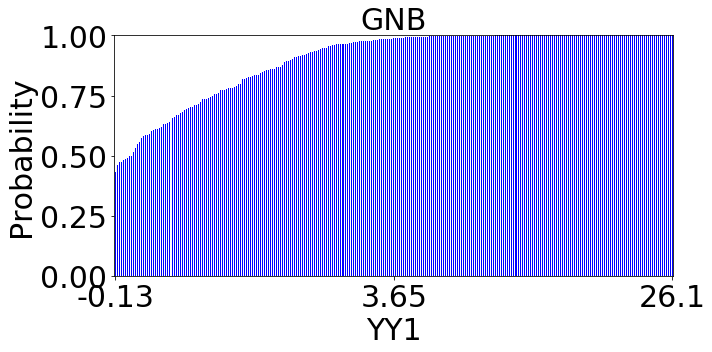

In [28]:
#plot the distribution
plot_distribution(prob_dist, X, 'YY1', '1')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-alternative_splicing-1-YY1.png', dpi=300)
plt.show()

# 20 newsgroups' distributions

# Load data

In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

#Get the three classes
categories = ['talk.politics.guns', 'rec.sport.baseball','comp.graphics']

# Load 20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

# Select tfidf feature
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(newsgroups_train.data)

#Get array
a = vectors.toarray()
b = newsgroups_train.target
c = newsgroups_train.target_names

#Transform target
b=[str(x) for x in b]
for i in range(0,1727):
    if b[i] == '0':
        b[i] = 'comp.graphics'
    if b[i] == '1':
        b[i] = 'rec.sport.baseball'
    if b[i] == '2':
        b[i] = 'talk.politics.guns'
        
#Get dataframe
b = np.array(b)
a = np.c_[b,a]
df = pd.DataFrame(a)

#Specify the name of the features
list_=['class']
for i in range(0,30664):
    str(i)
    list_.append('w'+str(i))
    
df.columns = list_
features = list_[1:]

# Get the features
X = df[features].values
# Get the target
y = df['class'].values


# Data preprocessing

In [30]:
# Standardize the features
X = scaler.fit_transform(X)

# Encode the target
y = le.fit_transform(y)

/home/user/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/user/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Hyperparameter tuning

In [31]:
tuning(X,y)

{'clf__var_smoothing': 1e-10} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])


# Fit X and y

In [32]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-10)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-10)

# Find high predictive words and plot distributions

# the distributions of comp.graphics

In [33]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))

#calculate the posterior probability 
prob(X,y)

In [34]:
#Get words
for j in range(X.shape[1]):#lie
    n=0
    proba = prob_dist[j, :, 0]
    for x in np.unique(proba):
        if x >= 0.9:
            n=n+1
    if n>=50:
        for k, v in vectorizer.vocabulary_.items():
            if v == j :
                print(v, n, k)
                break

1513 96 24
4238 65 able
4284 51 ac
4462 64 address
4535 51 advance
4873 76 am
5079 50 answer
5105 74 any
5106 84 anybody
5111 69 anything
5682 54 available
5970 53 based
6233 59 between
6371 62 bit
7303 51 california
7312 62 called
7656 68 center
8573 122 computer
10232 57 different
10627 66 does
11454 55 engineering
12481 113 find
12486 51 fine
12818 74 found
12907 69 free
14289 159 help
14627 65 hope
15442 77 info
15453 79 information
15944 86 its
16626 133 keywords
16792 50 knows
17465 75 line
17661 119 looking
19717 149 need
19786 51 net
19854 61 newsreader
19894 61 nice
21751 123 please
22837 59 question
23180 51 reading
24690 70 science
24927 63 send
25698 70 software
25781 72 sorry
26648 54 summary
26931 66 system
26933 55 systems
27327 82 thanks
27540 50 tin
27984 73 try
28248 57 uk
28688 104 using
29004 60 version
29415 70 wanted
29638 60 where
29938 100 work
30034 94 wrote


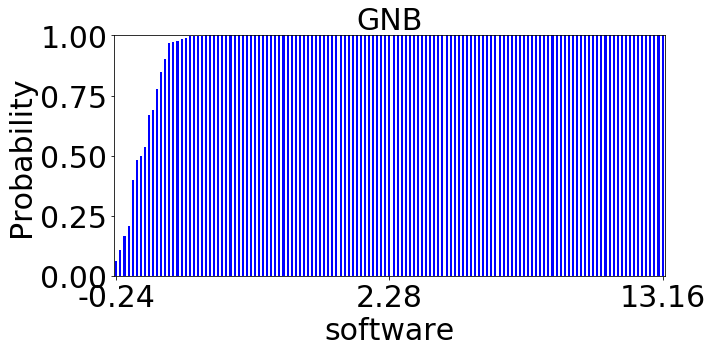

In [35]:
#plot the distribution
plot_distribution(prob_dist, X, 'w25698', 'comp.graphics')#software

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-20news-comp-software.png', dpi=300)
plt.show()

# Spambase' distribution

# Load data

In [36]:
import pandas as pd

# Load the data
df = pd.read_csv('spambase.data', header=None)

# Specify the name of the columns
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

# Features
features = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

#Specify the name of the features
# Get the features
X = df[features].values
# Get the target
y = df['class'].values

# Data preprocessing

In [37]:
# Standardize the features
X = scaler.fit_transform(X)

# Hyperparameter tuning

In [38]:
tuning(X,y)

{'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


# Fit X and y

In [39]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-9)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

# Get the posterior probability

In [40]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


# Plot distributions

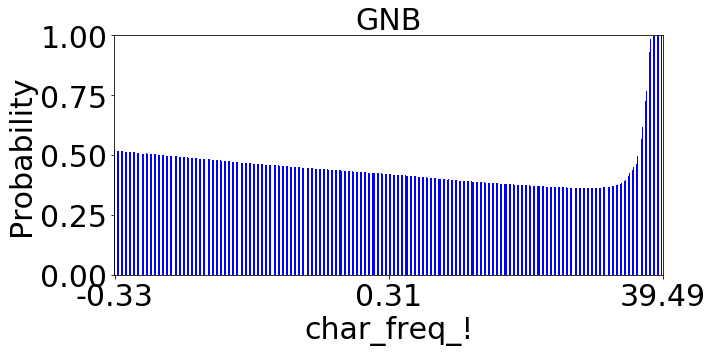

In [41]:
#plot the distribution
plot_distribution(prob_dist, X, 'char_freq_!', '0')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-spambase-0-char_freq_!.png', dpi=300)
plt.show()

# MNIST's distribution

# Load data

In [42]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('train.csv', header=None)

# Specify the name of the columns
list_=['class']
for i in range(0,784):
    str(i)
    list_.append('w'+str(i))
    
df.columns = list_
features = list_[1:]

# Get the features
X = df[features].values
# Get the target
y = df['class'].values

#Initialize a column
a=np.zeros([X.shape[0],1])

#Calculate the average of row
for i in range(0,28):
    b=np.mean(X[:,i*28:(i+1)*28],axis=1)
    a=np.c_[a,b]
    
#Calculate the average of column
n=0
for i in range(0,28):
    c=X[:,i]
    for j in range(28,784):
        if j%28==n:
            c=np.c_[c,X[:,j]]
    c=np.mean(c,axis=1)
    a=np.c_[a,c]
    n=n+1
    
#update X matrix    
X=a[:,1:58]
X = pd.DataFrame(X)

list_=['class']
for i in range(0,56):
    str(i)
    list_.append('w'+str(i))
    
X.columns = list_[1:]

# Data preprocessing

In [43]:
# Standardize the features
X = scaler.fit_transform(X)

# Hyperparameter tuning

In [44]:
tuning(X,y)

{'clf__var_smoothing': 1e-08} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-08))])


# Fit X and y

In [45]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-8)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-08)

# Find high predictive columns and plot distributions

In [46]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))

#Get columns
prob(X,y)

for j in range(X.shape[1]):#column
    n=0
    proba = prob_dist[j, :, 1].tolist()
    for x in np.unique(proba):
        if x >= 0.9:
             n=n+1
    if n>=10:
        print(j,n)

41 126
42 531


# Plot distributions

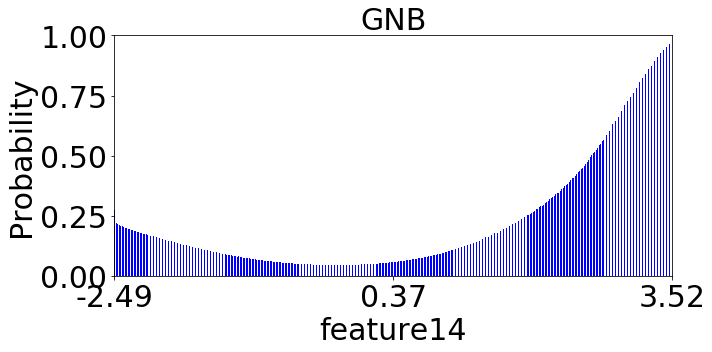

In [47]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '1')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-1-column14.png', dpi=300)
plt.show()

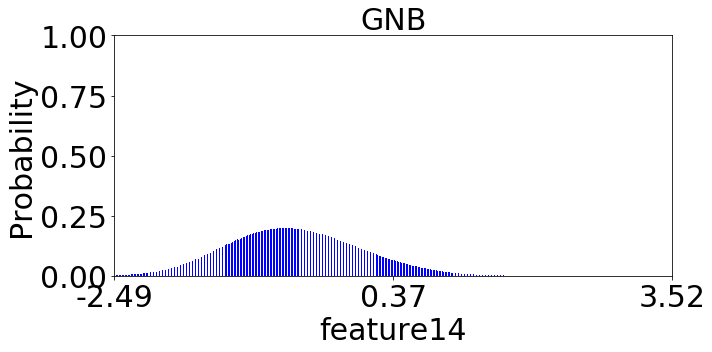

In [48]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '0')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-0-column14.png', dpi=300)
plt.show()

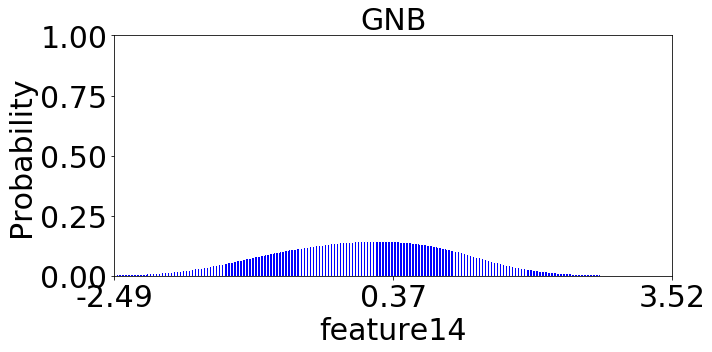

In [49]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '2')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-2-column14.png', dpi=300)
plt.show()

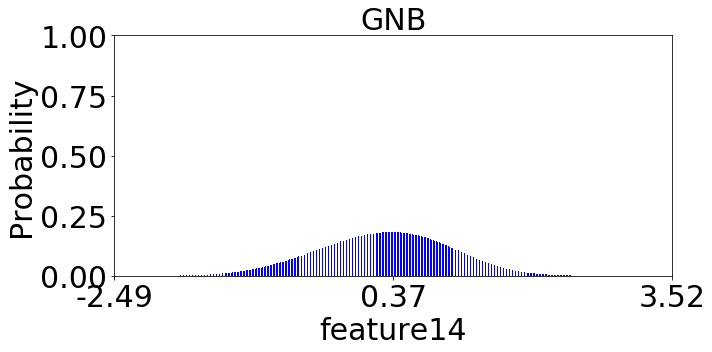

In [50]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '3')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-3-column14.png', dpi=300)
plt.show()

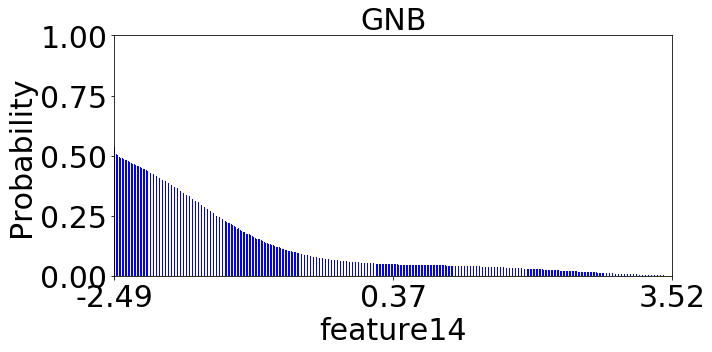

In [51]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '4')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-4-column14.png', dpi=300)
plt.show()

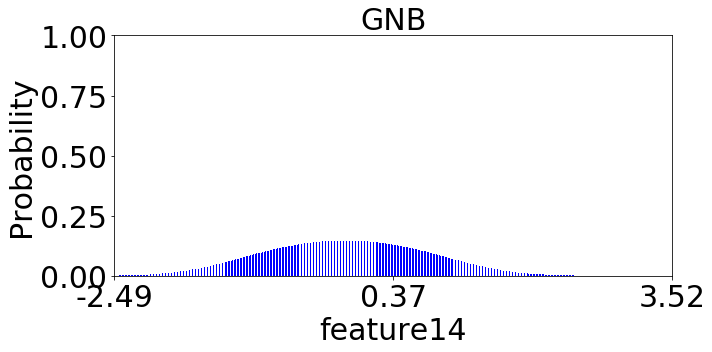

In [52]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '5')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-5-column14.png', dpi=300)
plt.show()

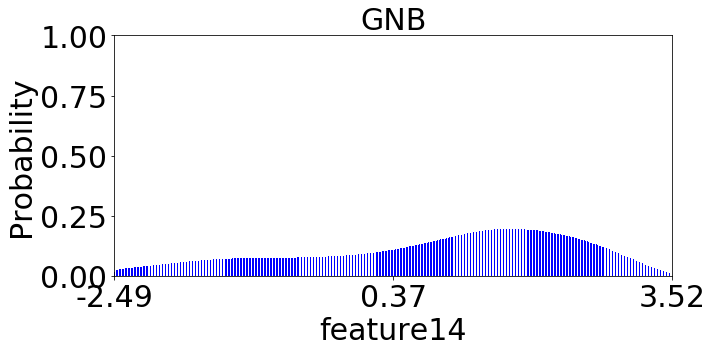

In [53]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '6')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-6-column14.png', dpi=300)
plt.show()

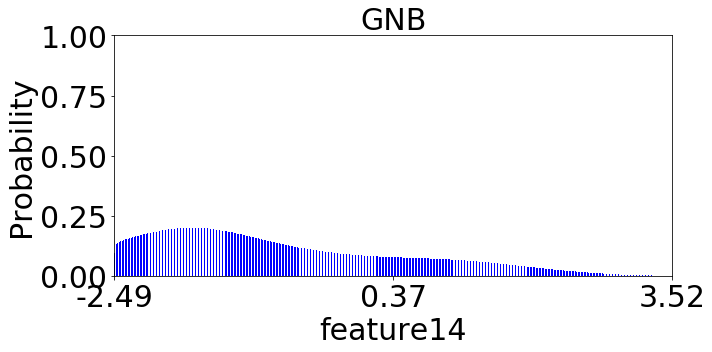

In [54]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '7')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-7-column14.png', dpi=300)
plt.show()

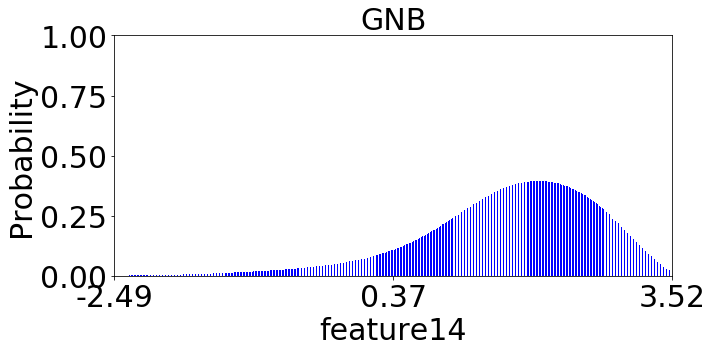

In [55]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '8')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-8-column14.png', dpi=300)
plt.show()

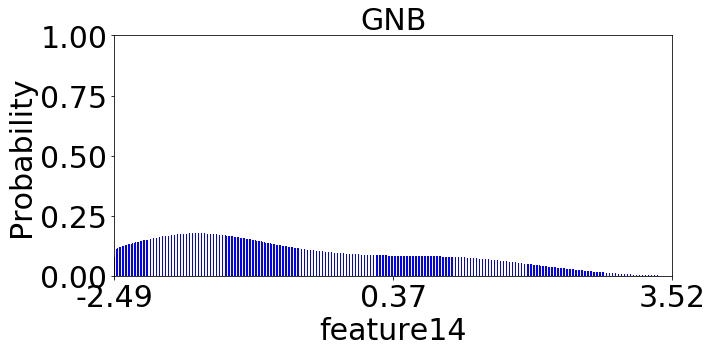

In [56]:
#plot the distribution
plot_distribution(prob_dist, X, 'w41', '9')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-mnist-9-column14.png', dpi=300)
plt.show()

# CIFAR-10's distribution 

# Load data

In [5]:
import numpy as np
import random
import pandas as pd
import pickle
import platform
import os
 
#加载序列文件
def load_pickle(f):
    version=platform.python_version_tuple()#判断python的版本
    if version[0]== '2':
        return pickle.load(f)
    elif version[0]== '3':
        return pickle.load(f,encoding='latin1')
    raise ValueError("invalid python version:{}".format(version))

#处理原数据
def load_CIFAR_batch(filename):
    with open(filename,'rb') as f:
        datadict=load_pickle(f)
        X=datadict['data']
        Y=datadict['labels']
        #X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
        #reshape()是在不改变矩阵的数值的前提下修改矩阵的形状,transpose()对矩阵进行转置
        Y=np.array(Y)
        return X,Y
        
        
#返回可以直接使用的数据集
def load_CIFAR10(ROOT):
    xs=[]
    ys=[]
    for b in range(1,6):
        f=os.path.join(ROOT,'data_batch_%d'%(b,))#os.path.join()将多个路径组合后返回
        X,Y=load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr=np.concatenate(xs)#这个函数用于将多个数组进行连接
    Ytr=np.concatenate(ys)
    del X,Y
    Xte,Yte=load_CIFAR_batch(os.path.join(ROOT,'test_batch'))
    return Xtr,Ytr,Xte,Yte


datasets='cifar-10-batches-py'
X_train,Y_train,X_test,Y_test=load_CIFAR10(datasets)

#get R,G,B array
XR = X_train[:,:1024]
XG = X_train[:,1024:2048]
XB = X_train[:,2048:3072]

XR = np.c_[Y_train, XR]
XG = np.c_[Y_train, XG]
XB = np.c_[Y_train, XB]


#get dataframe
df = pd.DataFrame(XR)

#name each pixel point
list_=['class']
for i in range(0,32):#row
    for j in range(0,32):#column
        list_.append(str(i)+'-'+str(j)+'R')
        
df.columns = list_
#Specify the name of the features
#del list_[0]
features = list_[1:]
# Get the features
X = df[features].values
# Get the target
y = df['class'].values

# Data preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

/home/user/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/user/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Hyperparameter tuning

In [7]:
tuning(X,y)

{'clf__var_smoothing': 1e-10} Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])


# Fit X and y

In [8]:
from sklearn.linear_model import LogisticRegression

# Declare the classifier
clf = GaussianNB(var_smoothing= 1e-10)

# Train the classifier
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-10)

# Get the posterior probability

In [9]:
#posterior probability matrix
prob_dist = np.zeros((X.shape[1], X.shape[0], len(np.unique(y))))
prob(X, y)

# Plot distributions

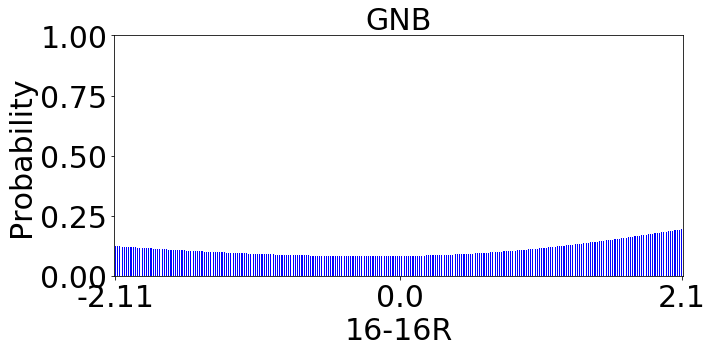

In [10]:
#plot the distribution
plot_distribution(prob_dist, X, '16-16R', '1')

#save the figure
plt.savefig('/media/user/2FD84FB396A78049/lwqa/pics/gnb-cifar-10-1-16-16R2.png', dpi=300)
plt.show()